In [1]:
#Description: This program predicts the price of intel stock for a specific day using ML algorithms
#import lib
import time
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df = pd.read_csv('INTC_5y.csv')
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,index
0,3/8/2016,30.830000,30.879999,30.379999,30.559999,26.788607,19104900,1
1,3/9/2016,30.830000,31.040001,30.670000,30.870001,27.060354,14707800,2
2,3/10/2016,31.139999,31.400000,30.379999,31.250000,27.393454,29584800,3
3,3/11/2016,31.670000,31.790001,31.530001,31.760000,27.840517,22811200,4
4,3/14/2016,31.660000,31.690001,31.299999,31.430000,27.551243,17438600,5
...,...,...,...,...,...,...,...,...
1253,3/1/2021,61.720001,63.080002,61.650002,62.880001,62.880001,28495400,1254
1254,3/2/2021,62.799999,63.139999,61.110001,61.240002,61.240002,23298800,1255
1255,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,1256
1256,3/4/2021,59.830002,60.240002,57.910000,58.330002,58.330002,40044900,1257


In [2]:
#Show the last row of data
actual_price = df.tail(1)
#Show the data
actual_price


,Date,Open,High,Low,Close,Adj Close,Volume,index
1257,3/5/2021,59.259998,61.18,58.509998,60.740002,60.740002,39501700,1258


In [3]:
#Get all of the data except the last row
df = df.head(len(df)-1)
#show
df


,Date,Open,High,Low,Close,Adj Close,Volume,index
0,3/8/2016,30.830000,30.879999,30.379999,30.559999,26.788607,19104900,1
1,3/9/2016,30.830000,31.040001,30.670000,30.870001,27.060354,14707800,2
2,3/10/2016,31.139999,31.400000,30.379999,31.250000,27.393454,29584800,3
3,3/11/2016,31.670000,31.790001,31.530001,31.760000,27.840517,22811200,4
4,3/14/2016,31.660000,31.690001,31.299999,31.430000,27.551243,17438600,5
...,...,...,...,...,...,...,...,...
1252,2/26/2021,60.889999,61.689999,59.680000,60.779999,60.779999,38210400,1253
1253,3/1/2021,61.720001,63.080002,61.650002,62.880001,62.880001,28495400,1254
1254,3/2/2021,62.799999,63.139999,61.110001,61.240002,61.240002,23298800,1255
1255,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,1256


In [4]:
# Create empty list 
days = list()
adj_close_prices = list()
#Get only the date and the adjusted close prices
df_days = df.loc[:,'index']
#show
df_days


0          1
1          2
2          3
3          4
4          5
        ... 
1252    1253
1253    1254
1254    1255
1255    1256
1256    1257
Name: index, Length: 1257, dtype: int64

In [5]:

df_adj_close = df.loc[:,'Adj Close']
#show
df_adj_close

0       26.788607
1       27.060354
2       27.393454
3       27.840517
4       27.551243
          ...    
1252    60.779999
1253    62.880001
1254    61.240002
1255    59.900002
1256    58.330002
Name: Adj Close, Length: 1257, dtype: float64

In [6]:
# Create the independent data set (dates)
for day in df_days:
    days.append([int(day)])
# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))


In [31]:
rbf_svr = SVR(kernel='rbf', C = 10000.0, gamma=0.5)
x = time.perf_counter()
rbf_svr.fit(days,adj_close_prices)
print(time.perf_counter()-x)

0.24743589999997084


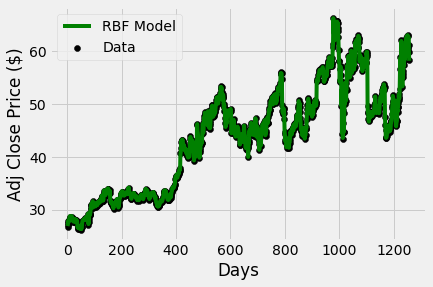

In [32]:
plt.scatter(days, adj_close_prices,color="black", label="Data")
plt.plot(days, rbf_svr.predict(days), color = "green", label = "RBF Model")
#plt.plot(days, poly_svr.predict(days), color = "orange", label = "Polynomial Model")
#plt.plot(days, lin_svr.predict(days), color = "blue", label = "Linear Model")
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [33]:
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume,index
1257,3/5/2021,59.259998,61.18,58.509998,60.740002,60.740002,39501700,1258


In [34]:
print(rbf_svr.predict([[1258]]))

[51.08186504]


In [37]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume,index
1255,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,1256
1256,3/4/2021,59.830002,60.240002,57.910000,58.330002,58.330002,40044900,1257


In [38]:
print(rbf_svr.predict([[1256]]))
print(rbf_svr.predict([[1257]]))


[59.80024897]
[58.22964438]
